In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

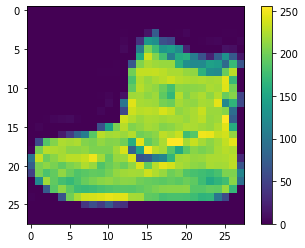

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

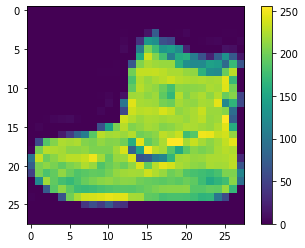

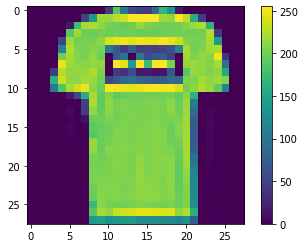

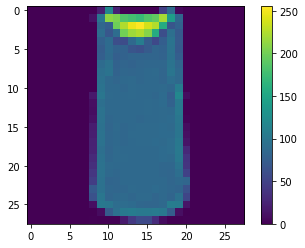

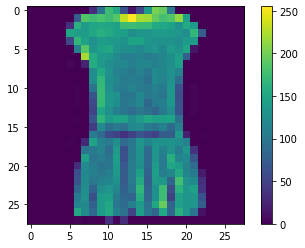

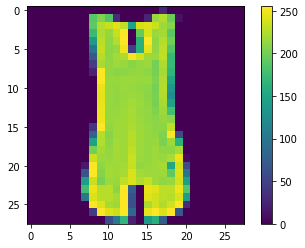

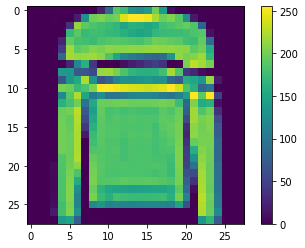

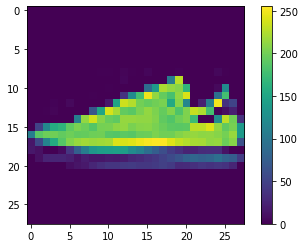

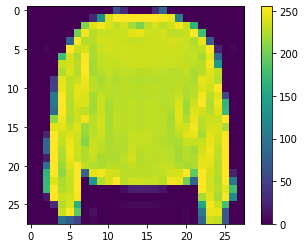

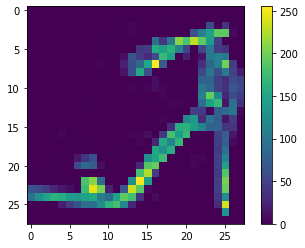

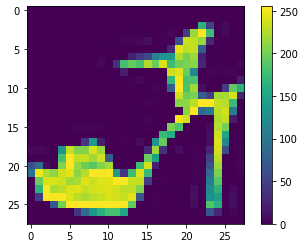

In [15]:
for i in range(10):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

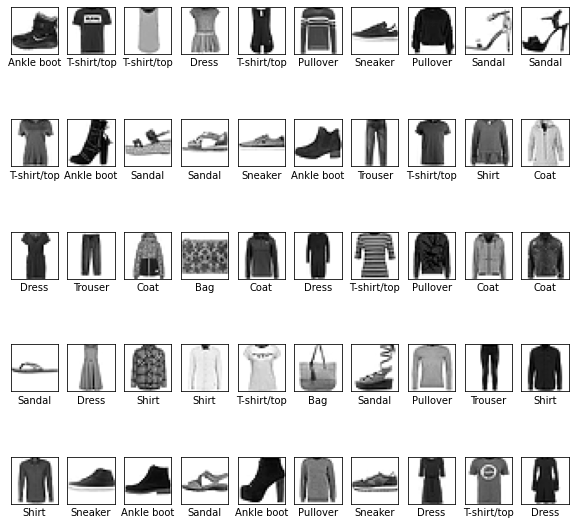

In [21]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4970 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3798 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3398 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3151 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2978 - acc: 0.8912


In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3570 - acc: 0.8728

Test accuracy: 0.8728


In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([6.9349320e-05, 1.9513259e-08, 5.9095544e-07, 1.2724225e-06,
       2.9740747e-06, 1.8860416e-02, 5.1810453e-04, 5.7651065e-02,
       1.1700951e-04, 9.2277914e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

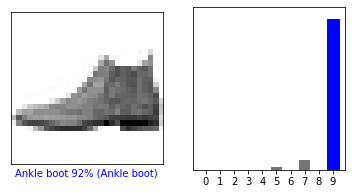

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

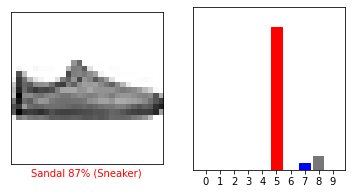

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

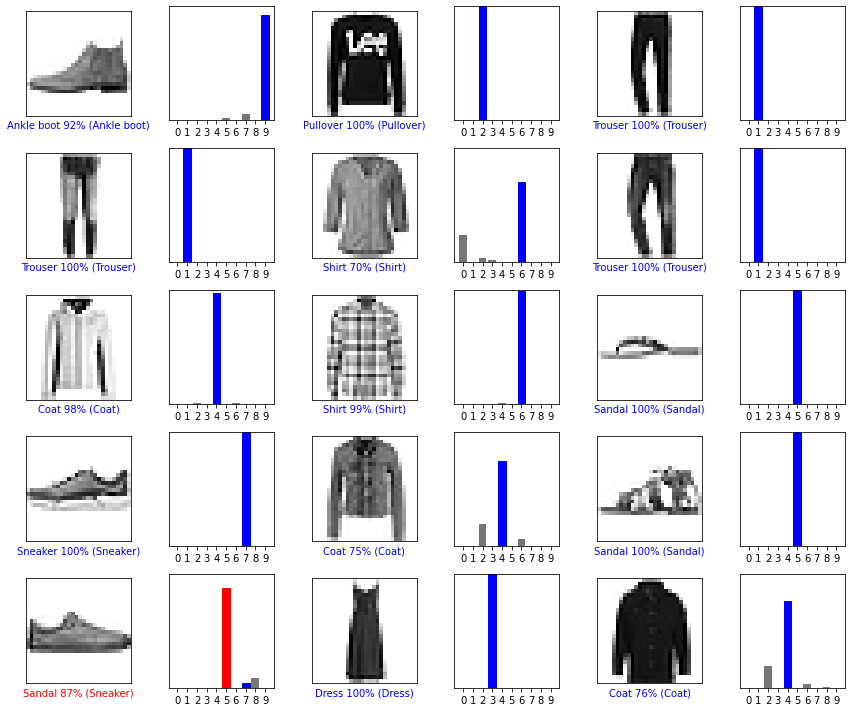

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [43]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [45]:
#Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.6184250e-05 1.1397187e-11 9.9970078e-01 6.0655374e-09 8.7240020e-05
  1.3004247e-09 1.7578086e-04 4.5248210e-13 2.5501919e-08 1.0549936e-13]]


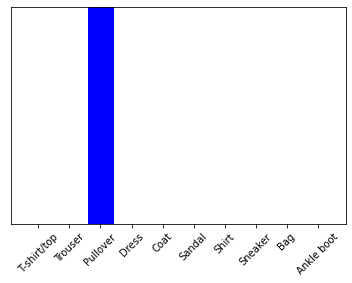

In [47]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

2